### Visualization example

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
%pip install nilearn

   ---------------------------------------- 0.0/10.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.4 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.1/10.4 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.4 MB 1.3 MB/s eta 0:00:08
    --------------------------------------- 0.2/10.4 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.3/10.4 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.4 MB 1.4 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.4 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.4 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/10.4 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.6/10.4 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/10.4 MB 1.4 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/10.4 MB 1.4 MB/s eta 0:00:07
   -- 

In [4]:
import sys
sys.executable

'C:\\Users\\user\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\python.exe'

In [1]:
import os
import numpy as np
from pathlib import Path
from PIL import Image
import matplotlib
from matplotlib import pyplot as plt
from nilearn import datasets
from nilearn import plotting
import cv2

data_dir = "..\\dataset\\"
subj = 'subj01'
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')

0
image 0 saved
1


KeyboardInterrupt: 

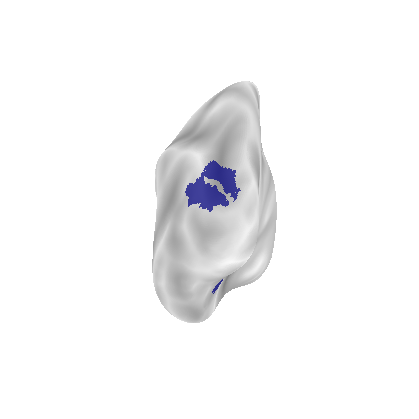

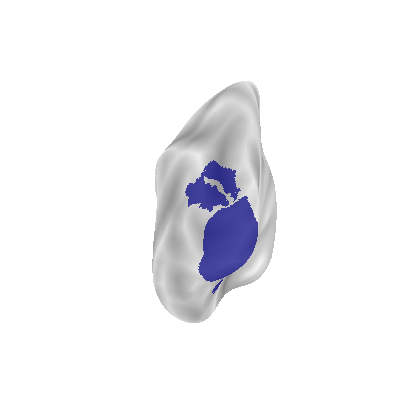

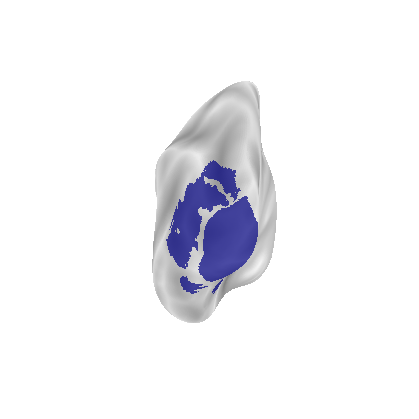

In [2]:
img = 0 #@param
hemisphere = ["l", "r"] #@param ['left', 'right'] {allow-input: true}
roi_focusing = {'prf-visualrois', 'floc-bodies', 'floc-places'}
fmri = {}
fmri['l'] = np.load(os.path.join(data_dir,subj, 'training_split\\training_fmri\\lh_training_fmri.npy'))
fmri['r'] = np.load(os.path.join(data_dir,subj, 'training_split\\training_fmri\\rh_training_fmri.npy'))
folder = os.path.join(data_dir,subj, 'training_split', 'training_brain_images')
if not os.path.exists(folder):
        os.makedirs(folder)
# plots = {}
for i in range(3):
        img = i
        print(img)
        fsaverage_response = {}
        roi_map = {}
        roi_mapping = {}
        challenge_roi = {'l':np.zeros(19004,), 'r':np.zeros(20544,)}
        fsaverage_roi = {'l':np.zeros(163842,), 'r':np.zeros(163842,)}
        # Load the ROI brain surface maps
        for items in hemisphere:
                if items =='l':hemi = 'left'
                else: hemi = 'right' 
                _hfmri = fmri[items]
                for i,m in enumerate(roi_focusing):
                        challenge_roi_class_dir = os.path.join(data_dir,subj, 'roi_masks',
                items+'h.'+m+'_space.npy')
                        fsaverage_roi_class_dir = os.path.join(data_dir,subj, 'roi_masks',
                items+'h.'+m+'_fsaverage_space.npy')
                        challenge_roi_class = np.load(challenge_roi_class_dir)
                        fsaverage_roi_class = np.load(fsaverage_roi_class_dir)
                        challenge_roi[items] = challenge_roi[items] + challenge_roi_class
                        fsaverage_roi[items] = fsaverage_roi[items] + fsaverage_roi_class
                        
                        fsaverage_response[items] = np.zeros(len(fsaverage_roi[items]))
                        fsaverage_response[items][np.where(fsaverage_roi[items])[0]] = \
                        _hfmri[img,np.where(challenge_roi)[0]]
                        plot = plotting.plot_surf_roi(fsaverage['infl_'+hemi], roi_map=fsaverage_response[items],
                                hemi=hemi, view='posterior',
                                bg_map=fsaverage['sulc_'+hemi], bg_on_data=True,
                                darkness=.5)
                        crop_box = (70, 315, 140, 270)
                        plot.savefig(f'{items}h_original.png')
        img1 = cv2.imread('lh_original.png')
        img2 = cv2.imread('rh_original.png')
        crop_box = (70, 315, 140, 270)
        img1 = img1[crop_box[0]:crop_box[1], crop_box[2]:crop_box[3]]
        img2 = img2[crop_box[0]:crop_box[1], crop_box[2]:crop_box[3]]
        merged_img = cv2.hconcat([img1, img2])
        cv2.imwrite(os.path.join(folder, f'{img}.png'), merged_img)
        print(f"image {img} saved")




In [12]:
img1 = cv2.imread('lh_original.png')
img2 = cv2.imread('rh_original.png')
# print(img.shape)
crop_box = (70, 315, 140, 270)

# # 裁切图像
img1 = img1[crop_box[0]:crop_box[1], crop_box[2]:crop_box[3]]
img2 = img2[crop_box[0]:crop_box[1], crop_box[2]:crop_box[3]]
merged_img = cv2.hconcat([img1, img2])

cv2.imwrite('finish.png', merged_img)

# 保存合并后的图像
cv2.imwrite('cropped_plot2.png', img1)

True

In [ ]:
fig = plotting.plot_surf_stat_map(
    fsaverage.infl_right, texture, hemi='right',
    title='Surface right hemisphere', colorbar=True,
    threshold=1., bg_map=curv_right_sign,
)
fig.show()

In [31]:
plt = plotting.plot_surf_roi(fsaverage['infl_'+hemi], roi_map=fsaverage_response,
                       hemi='left', view='posterior',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)
print(type(plt))
plt.savefig('my_plot2.png')

ValueError: The input type is not recognized. Valid inputs are a Numpy array or one of the following file formats: '.gii', '.gii.gz', '.mgz', '.nii', '.nii', Freesurfer specific files such as '.area', '.curv', '.sulc', '.thickness', '.label', '.an'.

In [18]:
import cv2
import numpy as np
img1 = cv2.imread('my_plot.png')
print(img.shape)
# 定义裁切区域，格式为 (top, bottom, left, right)
crop_box = (70, 315, 140, 270)

# # 裁切图像
cropped_img = img[crop_box[0]:crop_box[1], crop_box[2]:crop_box[3]]

# # 保存裁切后的图像
cv2.imwrite('cropped_plot2.png', cropped_img)
merged_img = cv2.hconcat([img1, img2])

# 保存合并后的图像
cv2.imwrite('merged_image.jpg', merged_img)

(400, 400, 3)


True

In [22]:
import cv2

# 读取第一张图像
img1 = cv2.imread('cropped_plot2.png')

# 读取第二张图像
img2 = cv2.imread('cropped_plot.png')

# 确保两张图像的大小相同（如果需要）
# img1 = cv2.resize(img1, (width, height))

# 合并两张图像
merged_img = cv2.hconcat([img2, img1])

# 保存合并后的图像
cv2.imwrite('merged_image.jpg', merged_img)


True

In [23]:
hemisphere = 'left' # left/right

roi_dir = os.path.join(data_dir, subj, 'roi_masks', hemisphere[0] + 'h.all-vertices_fsaverage_space.npy')
fsaverage_all_vertices = np.load(roi_dir)

fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
print(fsaverage)
# 3D:infl_right / infl_left, 2D:flat_right / flat_left
plotting.plot_stat_map(
    fsaverage['infl_' + hemisphere],
    display_mode="ortho",
    cut_coords=[36, -27, 60],
    title="display_mode='ortho', cut_coords=[36, -27, 60]",)
plotting.show()

{'area_left': 'C:\\Users\\user/nilearn_data\\fsaverage\\area_left.gii.gz', 'area_right': 'C:\\Users\\user/nilearn_data\\fsaverage\\area_right.gii.gz', 'curv_left': 'C:\\Users\\user/nilearn_data\\fsaverage\\curv_left.gii.gz', 'curv_right': 'C:\\Users\\user/nilearn_data\\fsaverage\\curv_right.gii.gz', 'flat_left': 'C:\\Users\\user/nilearn_data\\fsaverage\\flat_left.gii.gz', 'flat_right': 'C:\\Users\\user/nilearn_data\\fsaverage\\flat_right.gii.gz', 'infl_left': 'C:\\Users\\user/nilearn_data\\fsaverage\\infl_left.gii.gz', 'infl_right': 'C:\\Users\\user/nilearn_data\\fsaverage\\infl_right.gii.gz', 'pial_left': 'C:\\Users\\user/nilearn_data\\fsaverage\\pial_left.gii.gz', 'pial_right': 'C:\\Users\\user/nilearn_data\\fsaverage\\pial_right.gii.gz', 'sphere_left': 'C:\\Users\\user/nilearn_data\\fsaverage\\sphere_left.gii.gz', 'sphere_right': 'C:\\Users\\user/nilearn_data\\fsaverage\\sphere_right.gii.gz', 'sulc_left': 'C:\\Users\\user/nilearn_data\\fsaverage\\sulc_left.gii.gz', 'sulc_right': 'C:

AttributeError: 'GiftiImage' object has no attribute '_data_cache'